<a href="https://colab.research.google.com/github/Um333r/CIFAR10-small-images-classification-dataset/blob/master/CIFAR10_small_images_classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np 

#version Information
# tensorflow 2.2.0, cudnn7.6.5 and cuda 10.1, python3.8

In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
tf.test.is_built_with_cuda()

True

In [7]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


**Data Visualization**

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
X_train[0].shape

(32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
#let's verify

In [16]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

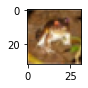

In [18]:
plot_sample(0)

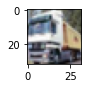

In [19]:
plot_sample(1)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

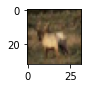

In [21]:
plot_sample(3)

In [24]:
classes[y_train[3][0]]

'deer'

**Scaling the images**

In [26]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [27]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [29]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

**Converting Y train to categorical values**

by using one hot encoding 

In [35]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')

In [36]:
y_train_categorical[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

**Model Building**

when we have one hot encoded value use categorical_crossentropy 




In [39]:
model= keras.Sequential([ keras.layers.Flatten(input_shape=(32,32,3)),
                         keras.layers.Dense(3000,activation='relu'),
                         keras.layers.Dense(100,activation='relu'),
                         keras.layers.Dense(1000,activation='sigmoid'),
                         keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train_categorical,epochs=58)

Epoch 1/58
1563/1563 [==============================] - 72s 45ms/step - loss: 2.0649 - accuracy: 0.2326
Epoch 2/58
1563/1563 [==============================] - 69s 44ms/step - loss: 1.8495 - accuracy: 0.3320
Epoch 3/58
1563/1563 [==============================] - 70s 45ms/step - loss: 1.7475 - accuracy: 0.3727
Epoch 4/58
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6696 - accuracy: 0.4034
Epoch 5/58
1563/1563 [==============================] - 68s 44ms/step - loss: 1.6151 - accuracy: 0.4214
Epoch 6/58
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5669 - accuracy: 0.4395
Epoch 7/58
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5261 - accuracy: 0.4537
Epoch 8/58
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4900 - accuracy: 0.4684
Epoch 9/58
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4594 - accuracy: 0.4768
Epoch 10/58
1563/1563 [==============================] - 65s 42m

In [40]:
model.predict(X_test_scaled)

313/313 [==============================] - 7s 20ms/step


array([[3.03617001e-01, 2.92994887e-01, 7.89753437e-01, ...,
        4.51727072e-04, 8.29770803e-01, 1.81462705e-01],
       [3.43317986e-01, 9.99010801e-01, 3.30233499e-02, ...,
        3.50696445e-01, 9.99178469e-01, 9.98503685e-01],
       [8.84423852e-01, 9.46520507e-01, 1.70732662e-01, ...,
        9.15365756e-01, 9.85431314e-01, 9.63496089e-01],
       ...,
       [2.92839110e-01, 1.49441855e-02, 9.30783510e-01, ...,
        5.97500086e-01, 7.15636373e-01, 3.30938399e-01],
       [1.24540858e-01, 4.38092416e-03, 8.07982862e-01, ...,
        2.72089005e-01, 4.88430448e-02, 9.61694773e-03],
       [1.03532888e-01, 1.52916589e-03, 8.01030874e-01, ...,
        9.99570370e-01, 2.15209946e-02, 6.76532090e-02]], dtype=float32)

In [43]:
classes[y_test[0][0]]

'cat'

In [47]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 6s 20ms/step


'cat'

In [48]:
classes[y_test[1][0]]

'ship'

In [49]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 7s 24ms/step


'ship'

Checking overall accuracy of the model

In [50]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 7s 22ms/step - loss: 1.7238 - accuracy: 0.5186


[1.7237799167633057, 0.5185999870300293]

In [51]:
def get_model():
  model= keras.Sequential([ keras.layers.Flatten(input_shape=(32,32,3)),
                         keras.layers.Dense(3000,activation='relu'),
                         keras.layers.Dense(100,activation='relu'),
                         keras.layers.Dense(1000,activation='sigmoid'),
                         keras.layers.Dense(10,activation='sigmoid')
    
      ])

  model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
  return model


In [54]:
with tf.device('/CPU:0'):
     cpu_model= get_model()
     cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 71s 45ms/step - loss: 2.0611 - accuracy: 0.2401


In [55]:
with tf.device('/GPU:0'):
     cpu_model= get_model()
     cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 73s 46ms/step - loss: 2.0665 - accuracy: 0.2345
